# The SIR model

The [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)  is given by the following system of ODEs

$$
\dot S  = - \frac{\beta S I}{N}, \quad 
\dot I  = \frac{\beta S I}{N} - \gamma I, \quad 
\dot R  = \gamma I,
$$

where $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of recovered or removed individuals. $N$ is the total number of individuals, i.e. $N = S+I+R$. One can easily verify that $\dot N = 0$ by adding the three equations. Hence $N$ is constant. $\beta$ and $\gamma$ are parameters: $\beta$ is the average number of contacts per person per time, $\gamma$ is the reciprocal of the time an individual remains infectious. 

The basic reproduction ratio is given by $\displaystyle{R_0 = \frac{\beta}{\gamma}}$.

The Python code cells below compute numerical solutions to this model by calling the SciPy ODE solver odeint. 

Results are shown for specific parameter values: $\beta = 0.3$ and $\gamma = 0.1$, corresponding to $R_0 = 3$. The initial conditions are $S(0) = 10^6 - 5$, $I(0) = 5$, and $R(0) = 0$. So, we start with only 5 infectious individuals in a population of size $N=10^6$. 

The first plot below shows the time series of the three variables. Time can be thought of a measured in days so 180 days is about 6 months. The model captures the basics of the disease progression where the number of infectious individuals initially grows (outbreak). Eventually the number of infections individuals reaches a peak and thereafter decreases. 

The second plot shows a phase portrait in the $(S,I)$ plane. A diamond shows the initial condition, and a circle shows the final state. The plots show a different view of the disease progression. Note that at the final time, there are some individuals who did not contract the disease ($S(t_f) > 0$). 

---

# Part A: Baseline case

### This section will model the curves and peaks associated with an infectious disease based on the SIR model, and very see how 3 different values vary.

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [3]:
# --- Problem setup --- #

# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10.0**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [4]:
# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

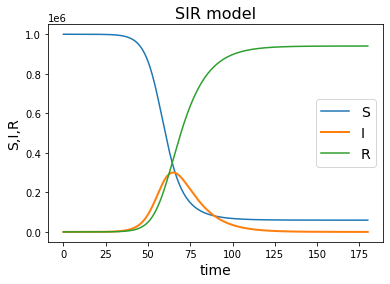

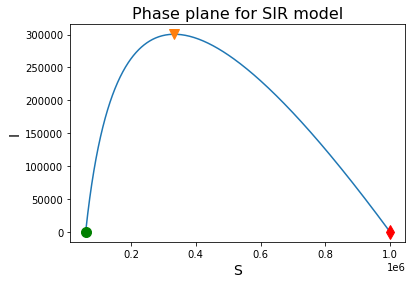

At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=tf) = 59531
I(t=tf) = 51
R(t=tf) = 940418
The maximum value of I is 300463.6740973029 at an S value of 332721.02710906375


In [5]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)
# plot the maximum I value with corresponding S value
plt.plot(S[np.argmax(I)],np.max(I),"v", markersize=10)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.show()

# --- Report the final values of S, I, R.  --- #

print("At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))
print("The maximum value of I is",np.max(I),"at an S value of",S[np.argmax(I)])

---

# Part B: Prior immunity

### This section will investigate the effects on 'flattening the curve' using a population with a percentage of them already in R, namely 20%, whether it be vaccinated or natural immunity.

In [6]:
# --- Use the same RHS of the ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [7]:
# --- New problem setup --- #

# set up time grid for solution (same)
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# Set new initial conditions and put into array ypi0
Spi0 = 8*10**5 - 5 
Ipi0 = 5
Rpi0 = 2*10**5 #20% of the population
ypi0 = np.array([Spi0, Ipi0, Rpi0])

In [8]:
# --- Again call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, ypi0, t)

# extract S, I, R from the solution array y
Spi = y_sol[:,0]
Ipi = y_sol[:,1]
Rpi = y_sol[:,2]

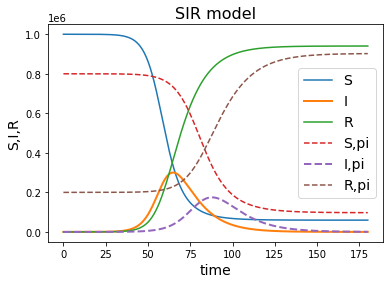

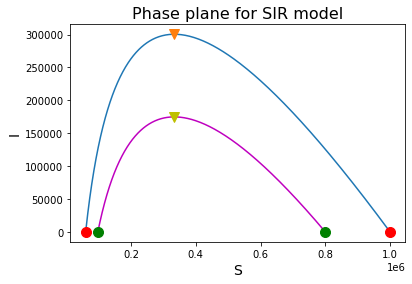

The maximum value of I is 300463.6740973029 at an S value of 332721.02710906375
The maximum value of I with prior immunity is 174845.5900502789 at an S value of 332927.1299088261



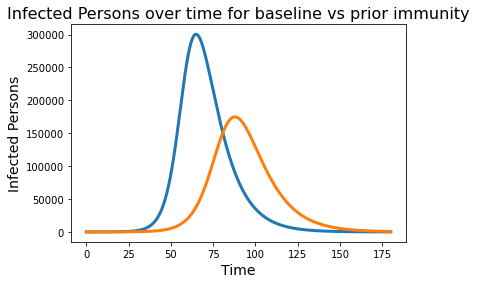

In [9]:
# --- Plot various interesting things again--- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")
# plot the time evolutions of S, I, R with prior immunity (indicated by "pi"), on the same plot
plt.plot(t, Spi, '--' ,label="S,pi")
plt.plot(t, Ipi, '--' ,lw = 2, label="I,pi")
plt.plot(t, Rpi, '--' ,label="R,pi")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)
# plot the maximum I value with corresponding S value
plt.plot(S[np.argmax(I)],np.max(I),"v", markersize=10)

# plot the evolution in the S,I phase plane with prior immunity (again indicated by "pi"), again on same plot
plt.plot(Spi, Ipi,'m')
# plot the maximum I value with corresponding S value
plt.plot(Spi[np.argmax(Ipi)],np.max(Ipi),"yv", markersize=10)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'ro', markersize = 10)
plt.plot(S[-1], I[-1], 'ro', markersize = 10)
plt.plot(Spi[0], Ipi[0], 'go', markersize = 10)
plt.plot(Spi[-1], Ipi[-1], 'go', markersize = 10)
plt.show()

# --- Report the max values of I in the different cases  --- #
print("The maximum value of I is",np.max(I),"at an S value of",S[np.argmax(I)])
print("The maximum value of I with prior immunity is", np.max(Ipi), "at an S value of",Spi[np.argmax(Ipi)])
print()

# Produce a plot of infected persons over time for baseline and for prior immunity
plt.plot(t,I,lw=3)
plt.plot(t,Ipi,lw=3)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Infected Persons", fontsize=14)
plt.title("Infected Persons over time for baseline vs prior immunity", fontsize=16)
plt.show()

---

# Part C: Social Distancing

### In this section it will investigate the effects on 'flattening the curve' using a model of social distancing or a mask mandate, which will vary the parameter that controls rate of infection.

In [10]:
# --- Define new RHS of the ODE system (with new value tm and varying beta values) --- #

def SIRsd(y, t):
    # returns RHS of the SIR model with social distancing taken into account
    S, I, R = y
    
    tm=43
    if t<=tm:
        beta=0.3
    elif tm<t<=tm+30:
        beta=0.24
    elif tm+30<t:
        beta=0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [11]:
# --- New problem setup --- #

# Set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# Keep same initial conditions as baseline case and put into array new array ysd0.
Ssd0 = 10.0**6 - 5
Isd0 = 5
Rsd0 = 0
ysd0 = np.array([Ssd0, Isd0, Rsd0])

In [12]:
# --- Again call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIRsd, ysd0, t)

# extract S, I, R from the solution array y
Ssd = y_sol[:,0]
Isd = y_sol[:,1]
Rsd = y_sol[:,2]

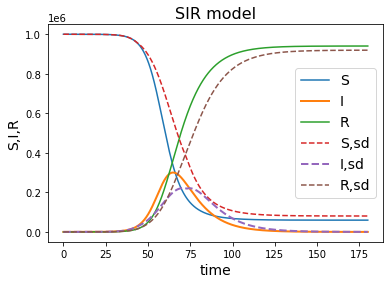

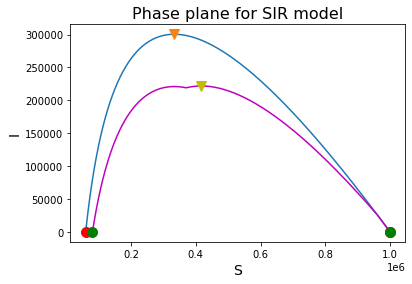

The maximum value of I is 300463.6740973029 at an S value of 332721.02710906375
The maximum value of I with social distancing is 221850.67776266113 at an S value of 416101.5612250196



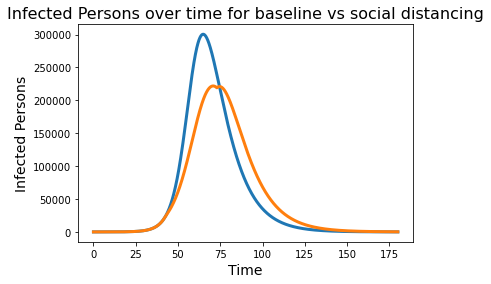

In [13]:
# --- Plot various interesting things again, again--- #

# plot the time evolution of the S, I, R
plt.plot(t, S, label="S")
plt.plot(t, I, lw = 2, label="I")
plt.plot(t, R, label="R")
# plot the time evolutions of S, I, R with social distancing (indicated by "sd"), on the same plot
plt.plot(t, Ssd, '--' ,label="S,sd")
plt.plot(t, Isd, '--' ,lw = 2, label="I,sd")
plt.plot(t, Rsd, '--' ,label="R,sd")

# labels etc
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14)
plt.show()        

# plot the evolution in the S,I phase plane
plt.plot(S, I)
# plot the maximum I value with corresponding S value
plt.plot(S[np.argmax(I)],np.max(I),"v", markersize=10)

# plot the evolution in the S,I phase plane with social distancing (again indicated by "sd"), again on same plot
plt.plot(Ssd, Isd,'m')
# plot the maximum I value with corresponding S value
plt.plot(Ssd[np.argmax(Isd)],np.max(Isd),"yv", markersize=10)

# labels etc
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)

# put some markers to show initial and final states
plt.plot(S[0], I[0], 'ro', markersize = 10)
plt.plot(S[-1], I[-1], 'ro', markersize = 10)
plt.plot(Ssd[0], Isd[0], 'go', markersize = 10)
plt.plot(Ssd[-1], Isd[-1], 'go', markersize = 10)
plt.show()

# --- Report the max values of I in the different cases  --- #
print("The maximum value of I is",np.max(I),"at an S value of",S[np.argmax(I)])
print("The maximum value of I with social distancing is", np.max(Isd), "at an S value of",Ssd[np.argmax(Isd)])
print()

# Produce a plot of infected persons over time for baseline and for social distancing
plt.plot(t,I,lw=3)
plt.plot(t,Isd,lw=3)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Infected Persons", fontsize=14)
plt.title("Infected Persons over time for baseline vs social distancing", fontsize=16)
plt.show()